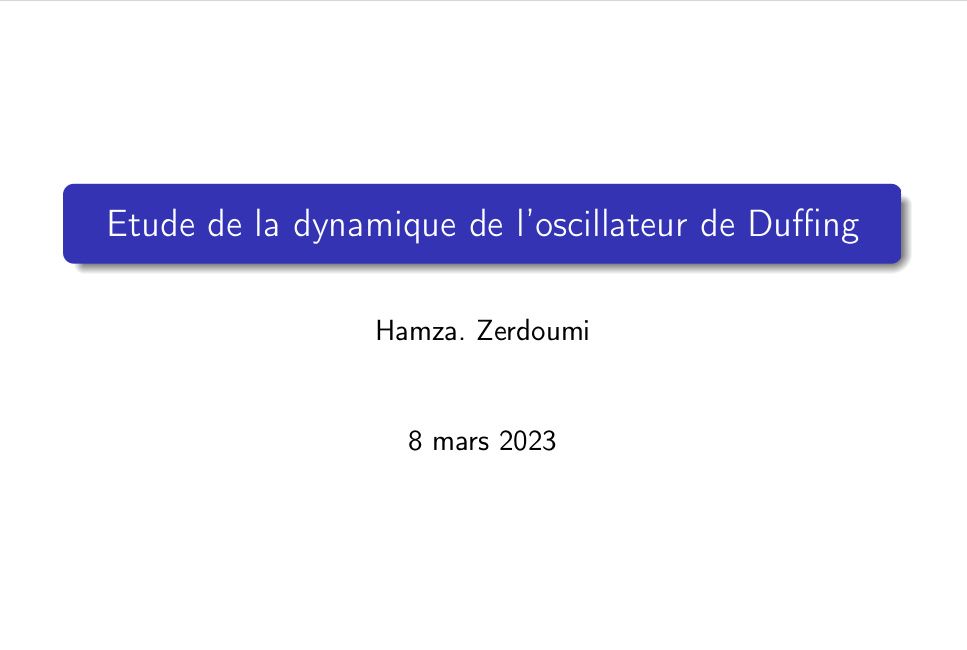

In [28]:
from IPython.display import display
from IPython.display import Image
display(Image(filename='jypeter.png', width=1300))


## Oscillateur de Duffing cas non-linéaire 

#### Equation de l'oscillateur de Duffing 
## $$\ddot{x}+r\dot{x}+\omega_0^2x +\beta x^3=f\cos(\omega t)$$

### Afin d'étudier analytiquement l'effet des non linérités on prend:  $\omega_0^2=-1$ et $\omega=\beta=1$ $\quad$ $r=0$ $\quad$ $ f=0$
### $$ 
f(x) =
\begin{cases}
 & \dot{x}=y  \\
 & \dot{y}=x-x^3
\end{cases}
$$
### Les point fixes sont $(0,0)$, $(\mp1,0)$
#### Aprés la linearisation du système autour des points fixes 
#### Le determinant de la  matrice Jacobien nous permet de conclure la stabilité de chaque point.
####  On a trouvé que le point l'origine  est un stable (saddle point ) , est les point $(\mp1,0)$ centre 
#### Pour voir la trajectoire dans l'espace de phase:
#### On utilise la méthode de Euler pour trouver la solution de ce systeme

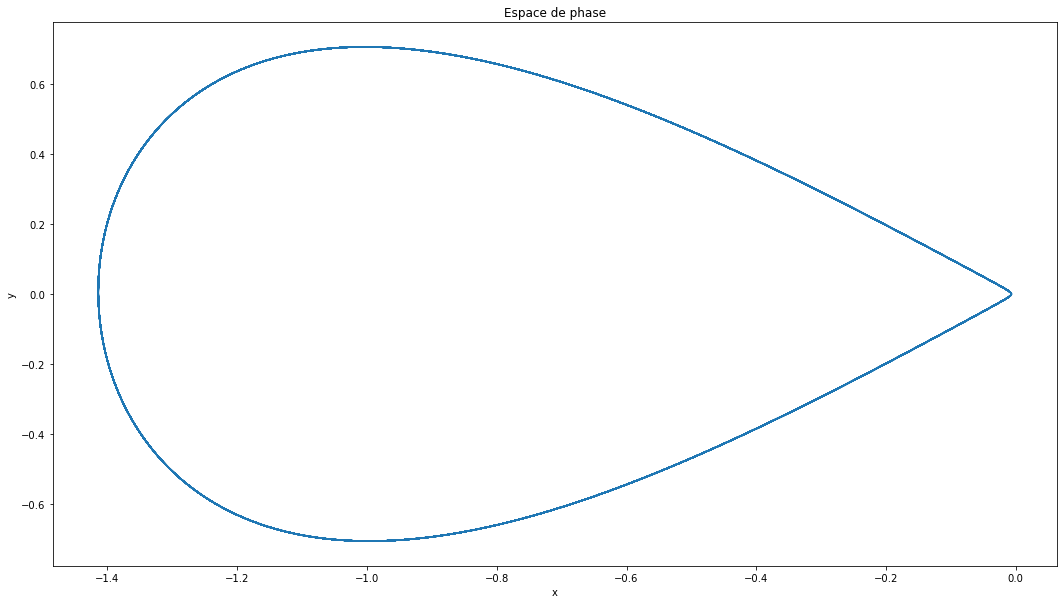

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
def Euler(x,t,case):
    if case==0:
        return x-x**3
    if case==1:
        return x
h=0.01
# pour voir l'autre section de l'espace de phase on peut changer uniquement les condition initiales. 
x=-0.1
y=-0.1
tf=300
x_cum=[]
y_cum=[]
for t in np.arange (0,tf,h):  
    x_cum.append(x)
    y_cum.append(y)
    x=x+h*Euler(y,tf,1)
    y=y+h*Euler(x,tf,0)

plt.figure(figsize=(18,10))
#plt.contour(x_cum,y_cum,z)
plt.plot(x_cum,y_cum)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espace de phase')
plt.show()

#### On voit que le point (0,0) est un point homocline.

### En Tenant compte de la dissipation $(r\neq0)$ et du parametre de forçage f:   
$$f<<$$
$$r\neq0$$




$$
\begin{cases}
&\dot{x}=y \\
&\dot{y}=x-rx-x^3+fcos(\omega t)
\end{cases}
$$

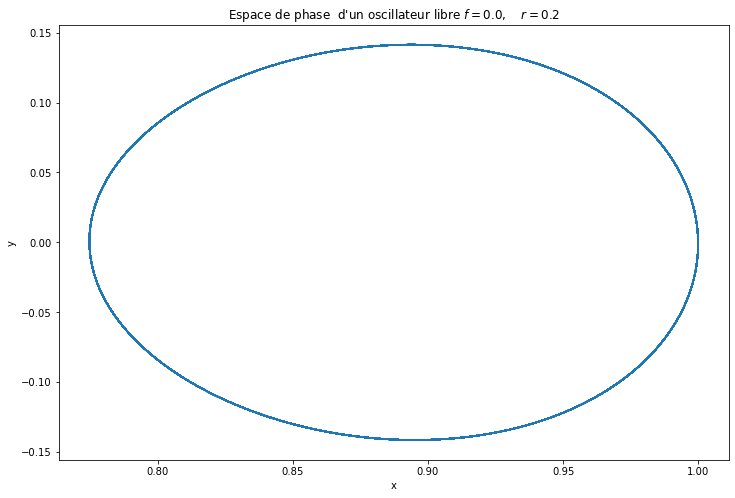

In [137]:

def Euler1(x,f,t,case):
    if case==0:
        r,w=0.2,1
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
#pour voir l'autre section de l'espace de phase on peut changer uniquement les condition initiales. 
x=1
y=0
tf=200
x_cum=[] # pour enregistrer les données des position 
y_cum=[] # pour enregistrer les données des vitesses 
for t in np.arange (0,tf,h):
    x_cum.append(x)
    y_cum.append(y)
    x=x+h*Euler1(y,0,t,1)
    y=y+h*Euler1(x,0,t,0)
plt.figure(figsize=(12,8))
plt.plot(x_cum,y_cum)   
plt.xlabel('x')
plt.ylabel('y')
plt.title("Espace de phase  d'un oscillateur libre $f=0.0$,$\quad $ $r=0.2$")
plt.show()

### B 5-a $\quad$ $r=0.2 \quad f<<$

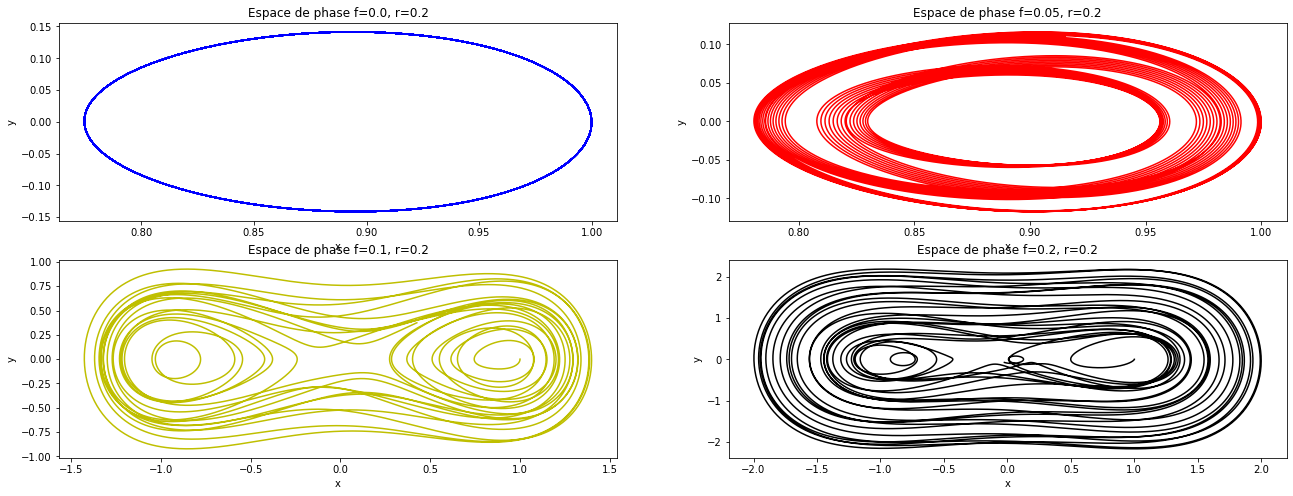

In [139]:
def Euler1(x,f,t,case):
    if case==0:
        r,w=0.2,1
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
tf=200
f=[0.0,0.05,0.1,0.2]
x_f_stock=[i*0 for i in range(len(f))] # pour stocker data pour chaque force 
y_f_stock=[i*0 for i in range(len(f))]
for i in range (len(f)):
    x,y=1,0
    x_cum1=[]
    y_cum1=[]
    for t in np.arange (0,tf,h):
        x_cum1.append(x)
        y_cum1.append(y)
        x=x+h*Euler1(y,0,t,1)
        y=y+h*Euler1(x,f[i],t,0)
    x_f_stock[i]=x_cum1
    y_f_stock[i]=y_cum1
plt.figure(figsize=(22,8))
RGB=['b','r','y','black']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(x_f_stock[i],y_f_stock[i],c=RGB[i])   
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Espace de phase f={f[i]}, r=0.2')
plt.show()

####  On variant f de gauche à droit  : 
#### On voit la  création  des  point fixe .
#### RQ:  La même conclusion si on variant f de droit à gouche.  

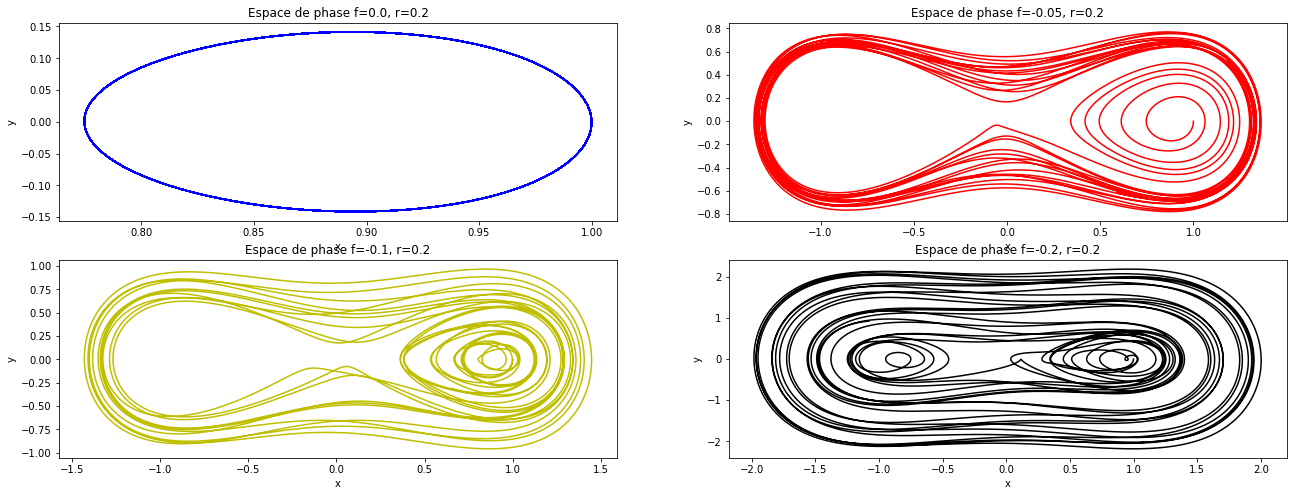

In [3]:
def Euler1(x,f,t,case):
    if case==0:
        r,w=0.2,1
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
tf=200
f=[0.0,-0.05,-0.1,-0.2]
x_f_stock=[i*0 for i in range(len(f))] # pour stocker data pour chaque force 
y_f_stock=[i*0 for i in range(len(f))]
for i in range (len(f)):
    x,y=1,0
    x_cum1=[]
    y_cum1=[]
    for t in np.arange (0,tf,h):
        x_cum1.append(x)
        y_cum1.append(y)
        x=x+h*Euler1(y,0,t,1)
        y=y+h*Euler1(x,f[i],t,0)
    x_f_stock[i]=x_cum1
    y_f_stock[i]=y_cum1
plt.figure(figsize=(22,8))
RGB=['b','r','y','black']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(x_f_stock[i],y_f_stock[i],c=RGB[i])   
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Espace de phase f={f[i]}, r=0.2')
plt.show()

### 4

### Pour voir le fait de la paramétre r sur la trajectoire homocline:                                                                                    On fait varier r pour 2 valeurs de f 

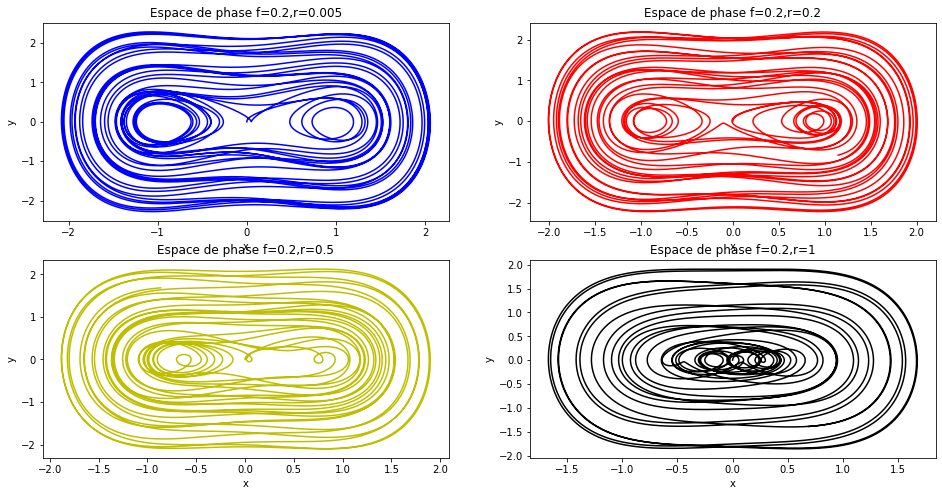

In [4]:
def Euler1(x,r,f,t,case):
    if case==0:
        w=1
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
tf=200
f=[0.05,0.2]
r=[0.005,0.2,0.5,1]
x_r_stock=[i*0  for i in range(len(r))] # pour stocker data pour chaque r 
y_r_stock=[i*0  for i in range(len(r))]
for i in range (len(r)): 
    x,y=0,0
    x_cum2=[]
    y_cum2=[]
    for t in np.arange (0,tf,h):
        x_cum2.append(x)
        y_cum2.append(y)
        x=x+h*Euler1(y,r[i],0,t,1)
        y=y+h*Euler1(x,r[i],f[1],t,0)
    x_r_stock[i]=x_cum2
    y_r_stock[i]=y_cum2
plt.figure(figsize=(16,8))
RGB=['b','r','y','black']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(x_r_stock[i],y_r_stock[i],c=RGB[i])   
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Espace de phase f={f[1]},r={r[i]}')
plt.show()
#  noublier pas de changer la valeur de f

### Pour $r\neq0$ il y'a   ouverture des trajectoires homoclines, le point fixe (0,0) ne change pas de nature alors que les points fixe $(\pm1,0)$ devient  des foyers stable $Re(\lambda)<0$
###  Pour plus d'information essayer de rendre  la partie $Re(\lambda)>0$  c-à-d  $r<0$  

### B-5  Maintenant on va augmenter le paramétre de controle et au aussi sa fréquence 
$$w=1.2,\quad r=0.3, \quad \beta=-\omega_0^2=1$$
$$\dot{x}=0,\quad x(0)=1$$

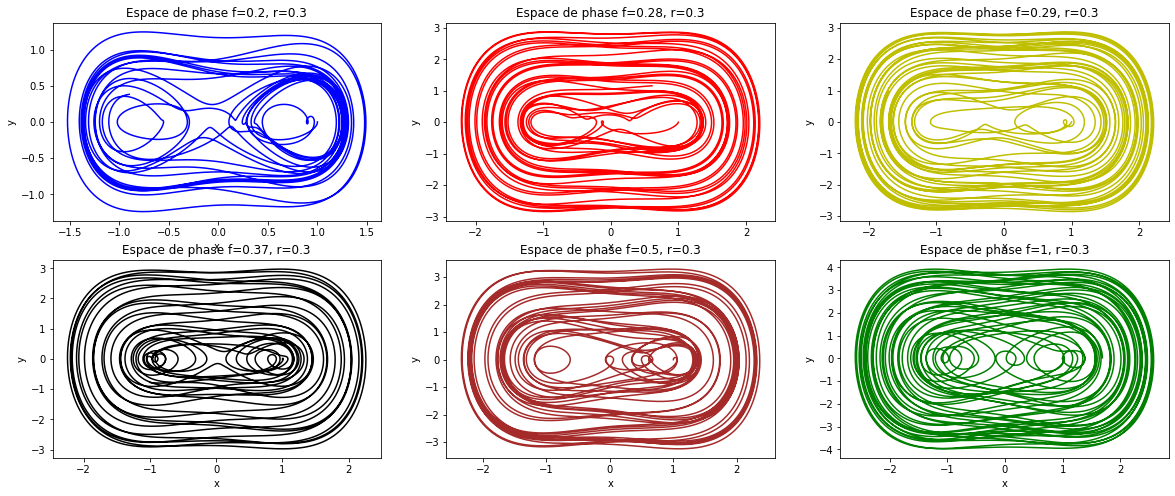

In [149]:
def Euler1(x,f,t,case):
    if case==0:
        r,w=0.3,1.2
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
#pour voir l'autre section de l'espace de phase on peut changer uniquement les condition initiales. 

tf=190
f=[0.2,0.28,0.29,0.37,0.5,1]
x_f_stock=[ i*0 for i in range(len(f))] # pour stocker data pour chaque force 
y_f_stock=[ i*0 for i in range(len(f))]
for i in range (len(f)):
    x,y=1,0
    x_cum=[]
    y_cum=[]
    for t in np.arange (0,tf,h):
        x_cum.append(x)
        y_cum.append(y)
        x=x+h*Euler1(y,0,t,1)
        y=y+h*Euler1(x,f[i],t,0)
    x_f_stock[i]= x_cum
    y_f_stock[i]=y_cum
plt.figure(figsize=(20,8))
RGB=['b','r','y','black','brown','g']

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(x_f_stock[i], y_f_stock[i],c=RGB[i])   
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Espace de phase f={f[i]}, r=0.3')
plt.show()
# on peut changer même la condition initiale pour voire la sensibilté au condition initiale . 

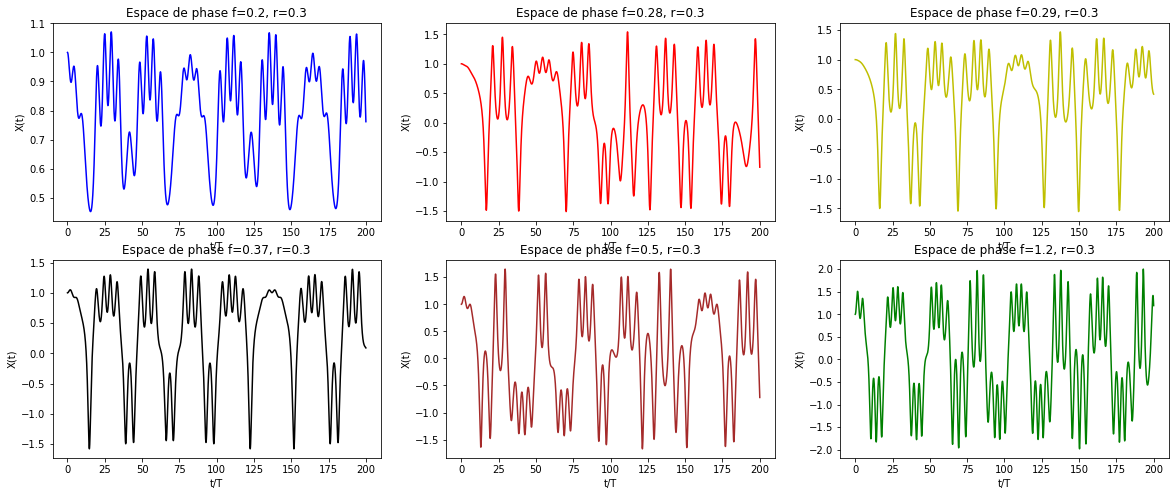

In [155]:
def Euler1(x,f,t,case):
    if case==0:
        r,w=0.3,1.2
        T=2*np.pi/w
        t=t/T
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
#pour voir l'autre section de l'espace de phase on peut changer uniquement les condition initiales. 
tf=200
x_f_stock=[i*0 for i in range(len(f))] # pour stocker data pour chaque force 
y_f_stock=[i*0 for i in range(len(f))]
f=[0.2,0.28,0.29,0.37,0.5,1.2]
w=1.2
T=2*np.pi/w
for i in range (len(f)):
    x,y=1,0  # CI
    x_cum=[]
    y_cum=[]
    for t in np.arange (0,tf,h):
        x_cum.append(x)
        y_cum.append(y)
        x=x+h*Euler1(y,0,t,1)
        y=y+h*Euler1(x,f[i],t,0)
    x_f_stock[i]=x_cum
plt.figure(figsize=(20,8))
RGB=['b','r','y','black','brown','g']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(np.arange(0,tf,h), x_f_stock[i],c=RGB[i])   
    plt.xlabel('t/T')
    plt.ylabel('X(t)')
    plt.title(f'Espace de phase f={f[i]}, r=0.3')
plt.show()

#### On peut remarquer des oscillations spécifiques (des pics qui se répètent), ce qui indique la présence de cycles limites.

# Conclusion 

#### L'oscillateur de Duffing est un système dynamique non-linéaire qui peut être utilisé pour modéliser divers phénomènes physiques.
#### Il est caractérisé par une équation différentielle non-linéaire du deuxième ordre, qui décrit l'évolution de la position et de la vitesse d'un oscillateur dans le temps.
#### L'intérêt de l'oscillateur de Duffing réside dans sa capacité à produire un comportement chaotique.
#### En effet, il peut présenter des trajectoires périodiques, quasipériodiques ou chaotiques en fonction des paramètres du système et des conditions initiales.


###  Faibles  effets non linéaires  $(\beta<<)$ dans ces condition l'amplitude $A(\omega)$ est une solution de l'équation.
$$A^2\left[(\epsilon-\kappa A^2)^2+\frac{1}{4}r^2\right]=\left(\frac{f}{2\omega_0}\right)^2$$
#### Dans ce cas on a une equation de  degree 3 , le passage d'une solution à 3 solutions a lieu aux points où la variation de $A^2$ en fonction 
#### de la fréquence est diverge c'est -à- dire  cas de  résonance.
    
#### La condition de cette résonance est donnée par l'équation.
 $$\epsilon^2 -4\kappa A^2\epsilon +3\kappa^2 A^4 +\frac{1}{4}r^2=0$$
    
#### Les solution est $$\epsilon_\pm=\frac{4\kappa A^2}{2}\pm\frac{(4\kappa^2A^4-r^2)^{1/2}}{2}$$ 
Et on a $$\epsilon =\omega-\omega_0$$
$\Longrightarrow $
$$w_+=w_0+\epsilon_+$$ 
$$w_-=w_0-\epsilon_-$$

0.051639777949432225
0.06
0.05


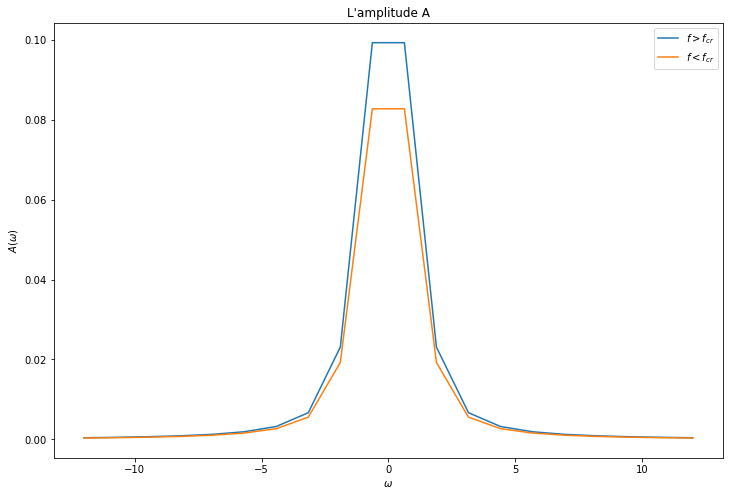

<Figure size 432x288 with 0 Axes>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
def amplitude(w,f):
    w_0=1
    r=0.1
    return f/(np.sqrt((w_0**2-w**2)**2+(r*w)**2))

f_cr=np.sqrt((8/3 )*0.1**3)
f1=0.06#np.random.uniform(f_cr+0.0002,1)   #  f> f_cr
f2=0.05#np.random.uniform(0,f_cr-0.002)   # f< f_cr
w=np.linspace(-12,12,20)
A_1=[]
A_2=[]
w_p=[]
w_m=[]
w_0=1
for j in range (w.shape[0]):
    A_1.append(amplitude(w[j],f1))
    A_2.append(amplitude(w[j],f2))
   # w_p.append(w_0+(1.5*A_2[j]**2+np.sqrt(abs((9/16 )*A_2[j]**4-0.1**2)))/2)
   # w_m.append(w_0+(1.5*A_2[j]**2-np.sqrt(abs((9/16 )*A_2[j]**4-0.1**2)))/2)
plt.figure(figsize=(12,8))
plt.plot(w,A_1, label='$f>f_{cr}$')
plt.plot(w,A_2,label="$f<f_{cr}$")
#plt.plot(w_m,A_1, label='$\omega_{-}$')
#plt.plot(w_p,A_1,label="$\omega_+$")
plt.title("L'amplitude A")
plt.xlabel("$\omega$")
plt.ylabel("$A(\omega)$")
plt.legend()
plt.figure()
print(f_cr)
print(f1)
print(f2)

In [ ]:
def Euler(x,t,case):
    r,f,w=0.3,0.5,1.2
    if case==0:
        T=2*np.pi/w
        return x-x**3-r*x+f*np.cos(w*t)
    if case==1:
        return x
h=0.01
x=1
y=0
tf=138
x_cum=np.zeros((int(tf/h)))
y_cum=np.zeros((int(tf/h)))
for t in np.arange (0,tf,h):  
    x_cum[int(t/h)]=x
    y_cum[int(t/h)]=y
    x=x+h*Euler(y,tf,1)
    y=y+h*Euler(x,tf,0)
plt.figure(figsize=(18,10))
#plt.contour(x_cum,y_cum,z)
plt.scatter(x_cum,y_cum)
y=np.linspace(-2,3,len(x_cum))*0.1/np.linspace(-2,3,len(x_cum))
y1=np.arange(-2,2,h)*0/np.arange(-2,2,h) # l'axe x 
x=np.arange(-2,2,h)*0/np.arange(-2,2,h) # l'axe y
plt.plot(x_cum,y,c='black',label='$\Sigma$')
plt.plot(np.arange(-2,2,h),y1,ls="--",label='y=0',lw=0.8)
plt.plot(x,np.arange(-2,2,h),ls="--",label='x=0',lw=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espace de phase')
plt.legend()
plt.show()
# poincaré section 
poincare_points=[]
kyna,makynach=0,0
for i in range (y_cum.size):
    if y_cum[i]==y[i]:
        poincare_points.appenda(y_cum[i])
        kyna+=1
    else :
        makynach+=1
print("kayna=",kyna,"\n","makayn=",makynach)
        

In [ ]:
poincare_points=np.empty((1,2))
for i in range (y_cum.size):
    if y_cum[i]==1:
        poincare_points[i]=y_cum[i]
print(poincare_points)

In [ ]:
def f(y,t):
    b=1
    return y*b
def rk2(y,t,f,h):
    k1=f(y,t)
    k2=f(y+h*k1,t+h)
    return k1+k2
h=0.1 
tf=10
y=-10
y1=-10
b=1
x=10
y_enregistre=np.zeros((int(tf/h)))
y1_enregistre=np.zeros((int(tf/h)))
x_enregistre=np.zeros((int(tf/h)))
x_enregistre[0]=y1_enregistre[0]=x
for t in np.arange(1,tf-1,h):
    #k11=f(y,t)
    #k22=f(y+h*k1,t+h)
    #k1=0
    #k2=b*h**2
    #y=y+(1/2)*(k1+k2)
    y1=y1+h*rk2(y,t,f,h)/2
    #y_enregistre[int(t/h)]=y
    y1_enregistre[int(t/h)+1]=y1
    x=x*np.exp(b*t)
    x_enregistre[int(t/h)+1]=x
plt.figure(figsize=(20,8))
#plt.plot(np.arange(0,tf,h),x_enregistre,label='exacte')
plt.plot(np.arange(0,tf,h),y1_enregistre,label='a moi')
#plt.plot(np.arange(0,tf,h),y_enregistre,label='narto')
plt.legend()
    

$\frac{dx(t)}{dt}=ax(t)$
$$ x(t)=x_0e^{at}$$

In [ ]:
def Eul(x,t):
    a=1
    return a*x
tf,h,y=100,0.001,1
y_e=[y]
x_e=[y]
for t in np.arange(0,tf+1,h):
    y=y + h*Eul(y,t)
    x=x*np.exp(t)
    y_e.append(y)
    x_e.append(x)
y_e.pop()
x_e.pop()
plt.figure(figsize=(20,8))
plt.plot(np.arange(0,tf+1,h) , y_e , label='Euler')
plt.plot(np.arange(0,tf+1,h) ,np.exp(np.arange(0,tf+1,h)) , label='exact')
plt.legend()

In [ ]:
def f2(x,t):
    a=1.8
    return a*x
tf,h,y1=2,0.1,1
y_e1=[y]
for t in np.arange(0,tf+1,h):
    k1=f2(y1,t)
    k2=f2(y+h*k1,t+h)
    y1=y1 + h*(k1+k2)/2
    y_e1.append(y)
y_e1.pop()
plt.figure(figsize=(20,8))
plt.plot(np.arange(0,tf+1,h) , y_e1 , label='Euler')
#plt.plot(np.arange(0,tf+1,h) ,np.exp(np.arange(0,tf+1,h)) , label='exact')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
omega_0 = 1
beta = 0
f = 0.2
omega = 0.8
r1 = 1.5*omega_0
r2 = 3.0*omega_0

# Fonction qui calcule l'évolution de x et de sa dérivée dans le temps
def duffing_oscillator(x0, x_dot0, r):
    dt = 0.01
    T = 50
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    x_dot = np.zeros_like(t)
    x[0] = x0
    x_dot[0] = x_dot0

    for i in range(1, len(t)):
        x_ddot = -r*x_dot[i-1] - omega_0**2*x[i-1] + f*np.cos(omega*t[i-1])
        x_dot[i] = x_dot[i-1] + x_ddot*dt
        x[i] = x[i-1] + x_dot[i]*dt

    return x, x_dot

# Trajectoires pour r < 2*omega_0
x1, x_dot1 = duffing_oscillator(0, 0.5, r1)
plt.plot(x1, x_dot1, label=r"$r < 2\omega_0$")

# Trajectoires pour r > 2*omega_0
x2, x_dot2 = duffing_oscillator(0, 0.5, r2)
plt.plot(x2, x_dot2, label=r"$r > 2\omega_0$")

plt.xlabel("x")
plt.ylabel("x_dot")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la fonction qui représente l'équation différentielle
def dy_dx(x, y):
    #return 2*(x**2-y**2)-x**4
    return (x-x**3)/y
# Définition de la grille d'évaluation
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcul des dérivées pour chaque point de la grille
DX = dy_dx(X, Y)/dy_dx(X, Y)
DY = dy_dx(X, Y)

# Traçage des trajectoires
plt.figure(figsize=(12,8))
plt.streamplot(X, Y,DX, DY,density=1.5, linewidth=1, arrowsize=1)#density=1.5, linewidth=1, arrowsize=1)
# Affichage du graphe
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la fonction qui représente l'équation différentielle
def dy_dx(x, y,f):
    w_0=-1
    t,r=1,0.2
    beta,w=1,1
    return (f*np.cos(w*t)-r*y+w_0**2*x-beta*x**3)/y
# Définition de la grille d'évaluation
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcul des dérivées pour chaque point de la grille
DX = dy_dx(X, Y,0)/dy_dx(X, Y,0)
DY = dy_dx(X, Y,0)

# Traçage des trajectoires
plt.figure(figsize=(12,8))
plt.streamplot(X, Y,DX, DY,density=1.5, linewidth=1, arrowsize=1)#density=1.5, linewidth=1, arrowsize=1)
# Affichage du graphe
plt.xlabel('x')
plt.ylabel('y')
plt.title("cas d-un oscillateur libre")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### Part B of Homework

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
def duffing(y,t,f=0):
    x,v=y
    w,beta,w_0,r=1,1,-1,2
    return [v,f*np.cos(w*t)-r*v+w_0**2*x-beta*x**3]
#initial condition 

y0=[0.1,0.1]

# drawing the phase portrait 
X,Y=np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
dX,dY=duffing([X,Y],0,f=0)
plt.streamplot(X,Y,dX,dY,density=1,linewidth=None)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Espace de phase pour l'oscillateur de Duffing libre f=0")
plt.show()


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
def duffing(y,t,f=0):
    x,v=y
    w,beta,w_0,r=1,1,-1,2
    return [v,f*np.cos(w*t)-r*v+w_0**2*x-beta*x**3]
#initial condition 

y0=[0.1,0.1]
t=np.linspace(0,100*np.pi,10000)
#Solution of differential equation 
sol =odeint(duffing,y0,t)

# drawing the phase portrait 
X,Y=np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
dX=[0,0,0]
dY=[0,0,0]
f=[0.05,0.1,0.9]
RGB=['r','b','g']
plt.figure(figsize=(16,8))
for i in range(3):
    dX[i],dY[i]=duffing([X,Y],0,f[i])
    plt.subplot(1,3,i+1)
    plt.streamplot(X,Y,dX[i],dY[i],density=1,linewidth=None,color=RGB[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"L'oscillateur de Duffing libre f={f[i]}")
plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
def duffing(y,t,f=0):
    x,v=y
    w,beta,w_0,r=1.2,1,-1,0.3
    return [v,f*np.cos(w*t)-r*v+w_0**2*x-beta*x**3]
#initial condition 

y0=[1,0]
t=np.linspace(0,100*np.pi,10000)
#Solution of differential equation 
sol =odeint(duffing,y0,t)

# drawing the phase portrait 
X,Y=np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
dX=[i*0 for i in range(6)]
dY=[i*0 for i in range(6)]
#.
f=[0.2, 0.28, 0.29, 0.37, 0.5,1]
RGB=['r','b','brown','g','black','y']
plt.figure(figsize=(16,8))
for i in range(6):
    dX[i],dY[i]=duffing([X,Y],0,f[i])
    plt.subplot(2,3,i+1)
    plt.streamplot(X,Y,dX[i],dY[i],density=1,linewidth=None,color=RGB[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"L'oscillateur de Duffing libre f={f[i]}")
plt.show()

In [ ]:
Methode de RK4 (simpson)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
#initialisation de la pas h , de la durée T. 
h=0.1
#initialisation de la conditions initiales: 
x_2=0
# definition de la fonction f(t,y)
# pour la x_2  
def duffing(t,x2,x1,f=0):
    w,beta,w_0,r=1.2,1,-1,0.3
    return  f*np.cos(w*t)-r*x2+w_0**2*x1-beta*x1**3
enregistre=np.zeros(len(np.arange (0,100,h)))
f=[0.2, 0.28, 0.29, 0.37, 0.5,1]
x_1=np.arange(1,101,h)
i=0
for t in np.arange (0,100,h):
    k1=duffing(t,x_2,x_1[i],f[0])
    x_2=x_2+h*k1
    k2=duffing(t+h/2,x_2+h*k1/2,x_1[i],f[0])
    k3=duffing(t+h/2,x_2+h*k2/2,x_1[i],f[0])
    k4=duffing(t+h,x_2+2*k3,x_1[i],f[0])
    x_2=x_2+(k1+2*k2+2*k3+k4)*h/6
    enregistre[i]=x_2
    i+=1
plt.plot(np.arange(0,100,h),enregistre)

In [ ]:
def f(t,x):
    return x
h=0.1
x_1=1
i=0
x_2=enregistre
for t in np.arange (0,100,h):
    k1=f(t,x_2[i])
    x_1=x_1+h*k1
    k2=f(t+h/2,x_2[i]+h*k1/2)
    k3=f(t+h/2,x_2[i]+h*k2/2)
    k4=f(t+h,x_2[i]+2*k3)
    x_1=x_1+(k1+2*k2+2*k3+k4)*h/6
    enregistre[i]=x_1
    i+=1
#print(enregistre)
plt.plot(np.arange(0,100,h),enregistre)

In [ ]:
def g(x2,x1,t,f=0):
    w,beta,w_0,r=1.2,1,-1,0.3
    return f*np.cos(w*t)-r*x2+w_0**2*x1-beta*x1**3
h=0.1
x=1
x_drow=np.zeros(len(np.arange(0,100,h)))
x1=np.arange(0,100,h)
for t in np.arange(0,100,h):
    x=x+g(x,x1[int(t/h)],t,1)*h/2
    x_drow[int(t/h)]=x
plt.plot(np.arange(0,100,h),x_drow)
v=x_drow   

In [ ]:
def g(v,t):
    return v
v=x_drow   
h=0.1
x1=1
x_drow=np.zeros(len(np.arange(0,100,h)))
for t in np.arange(0,100,h):
    x1=x1+g(v[int(t/h)],t)*h/2
    x_drow[int(t/h)]=x
plt.plot(np.arange(0,100,h),x_drow)

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Définition des paramètres
w = 1.2
r = 0.3
beta = -w**2
f_values = [0.2, 0.28, 0.29, 0.37, 0.5]
x0 = [1, 0]  # conditions initiales : x(0) = 1, y(0) = 0

# Définition de la fonction à intégrer
def duffing(t, x):
    return [x[1], -r*x[1] - beta*x[0]**3 + f*np.cos(w*t)]

# Boucle pour tracer les trajectoires pour différentes valeurs de f
for f in f_values:
    sol = solve_ivp(duffing, [0, 100], x0, t_eval=np.linspace(0, 100, 10000))
    x = sol.y[0]
    y = sol.y[1]
    plt.plot(x, y, label=f"f = {f}")

# Tracé des axes et des labels
plt.axhline(y=0, color='black', lw=0.5)
plt.axvline(x=0, color='black', lw=0.5)
plt.xlabel("x")
plt.ylabel("y")

# Affichage de la légende et du graphique
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Définition des paramètres
w = 1.2
r = 0.3
beta = -w**2
f_values = [0.2, 0.28, 0.29, 0.37, 0.5]
x0 = [1, 0]  # conditions initiales : x(0) = 1, y(0) = 0

# Définition de la fonction à intégrer
def duffing(t, x):
    return [x[1], -r*x[1] - beta*x[0]**3 + f*np.cos(w*t)]

# Boucle pour tracer les courbes x(T/t) pour différentes valeurs de f
for f in f_values:
    sol = solve_ivp(duffing, [0, 200], x0, t_eval=np.linspace(0, 2*np.pi/w, 10000))
    x = sol.y[0]
    t = sol.t
    plt.plot(2*np.pi/w/t, x, label=f"f = {f}")

# Tracé des axes et des labels
plt.axhline(y=0, color='black', lw=0.5)
plt.xlabel("T/t")
plt.ylabel("x")

# Affichage de la légende et du graphique
plt.legend()
plt.show()



In [ ]:
# Définition des paramètres
w = 1.2
r = 0.3
beta = -w**2
f_values = [0.2, 0.28, 0.29, 0.37, 0.5]
x0 = [1, 0]  # conditions initiales : x(0) = 1, y(0) = 0

# Calcul de la période T
T = 2*np.pi / w

# Boucle pour tracer les courbes x(T/t) pour différentes valeurs de f
for f in f_values:
    sol = solve_ivp(duffing, [0, 100*T], x0, t_eval=np.linspace(0, 100*T, 100000))
    x = sol.y[0]
    t = sol.t
    x_t = np.interp(T/t, T/t[::-1], x[::-1])  # interpolation pour obtenir les valeurs de x(T/t)
    plt.plot(t/T, x_t, label=f"f = {f}")

# Tracé des axes et des labels
plt.axhline(y=0, color='black', lw=0.5)
plt.xlabel("t/T")
plt.ylabel("x(T/t)")

# Affichage de la légende et du graphique
plt.legend()
plt.show()
